## Домашнее задание 8

1. Посчитать суммарное количество слов в gutenberg_raw (через simple_job)
2. Посчитать суммарное количество слов и суммарное количество предложений одним запуском simple_job(...)(gutenberg_raw)
3. Посчитать с помощью simple_job гистограмму распределения длины предложений (в словах) по датасету sent_tokenize(gutenberg.raw('carroll-alice.txt')). То есть какие предложения в тексте встречаются наиболее часто?
> Потом эти данные можно собрать в pandas DataFrame и визуализировать. Как правильно визуализировать заранее просчитанную гистограмму, см. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* Подсказка:
  * Вариант 1. Ключом может быть номер ячейки гистограммы. Тогда размер ячеек нужно задать заранее.
  * Вариант 2. Можно посчитать из каждого предложения целую гистограмму. Параметры гистограммы тоже придётся задавать заранее.
  * Вариант 3. Сделать ключом длину предложения. Проще всего с точки зрения map и reduce, но не до конца решает задачу (потребует дополнительной обработки результата).
4. Найти (с помощью simple_job) самое длинное предложение в gutenberg_raw
5. Переписать mapper и reducer из заданий 1-4 для hadooplike_job, проверить что логика их работы не меняется. Меняется ли ответ, если использовать редюсер и в качестве комбайнера тоже?


In [3]:
!pip install nltk pandas matplotlib

In [4]:
import nltk
nltk.download(['gutenberg', 'punkt'])
from nltk.corpus import gutenberg

import pandas as pd
import re

from nltk import word_tokenize, wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from typing import List, Dict, Any, Iterable, Callable, Tuple, Generator, Hashable,TypeVar

from collections import defaultdict
from itertools import islice, chain

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\maksk\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maksk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Посчитать суммарное количество слов в gutenberg_raw (через simple_job)

In [5]:
def simple_job():
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(gutenberg.raw())
    word_count = len(tokens)

    print(f"Количество слов: {word_count}")

simple_job()

Количество слов: 2199219


# 2. Посчитать суммарное количество слов и суммарное количество предложений одним запуском simple_job(...)(gutenberg_raw)

In [6]:
def simple_job(gutenberg_raw):

  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(gutenberg.raw())
  word_count = len(tokens)

  occurrences = 0
  for file_id in gutenberg.fileids():
    gutenberg_raw_text = gutenberg.raw(file_id)

    occurrences = occurrences + len(re.findall('\.', gutenberg_raw_text)) \
                              - len(re.findall('\.\.\.', gutenberg_raw_text)) \
                              - len(re.findall('\.\.\.', gutenberg_raw_text)) \
                              + len(re.findall('\!', gutenberg_raw_text)) \
                              + len(re.findall('\?', gutenberg_raw_text))
  return word_count, occurrences

word_count, occurrences = simple_job(gutenberg.raw)

print(f"Количество слов: {word_count}")
print(f"Количество предложений: {occurrences}")

Количество слов: 2199219
Количество предложений: 100663


# 4. Найти (с помощью simple_job) самое длинное предложение в gutenberg_raw

In [7]:
def simple_job(raw_text):
    
    sentences = sent_tokenize(raw_text)
    longest_sentence = max(sentences, key=len)
    word_count = len(longest_sentence.split())
    return longest_sentence, word_count

longest_sentence, word_count = simple_job(gutenberg.raw())

print(f"Количество слов в самом длинном предложении: {word_count}")
print(f"Самое длинное предложение:\n{longest_sentence}")

Количество слов в самом длинном предложении: 1059
Самое длинное предложение:
By the city's quadrangular houses--in log huts, camping with lumber-men,
Along the ruts of the turnpike, along the dry gulch and rivulet bed,
Weeding my onion-patch or hosing rows of carrots and parsnips,
    crossing savannas, trailing in forests,
Prospecting, gold-digging, girdling the trees of a new purchase,
Scorch'd ankle-deep by the hot sand, hauling my boat down the
    shallow river,
Where the panther walks to and fro on a limb overhead, where the
    buck turns furiously at the hunter,
Where the rattlesnake suns his flabby length on a rock, where the
    otter is feeding on fish,
Where the alligator in his tough pimples sleeps by the bayou,
Where the black bear is searching for roots or honey, where the
    beaver pats the mud with his paddle-shaped tall;
Over the growing sugar, over the yellow-flower'd cotton plant, over
    the rice in its low moist field,
Over the sharp-peak'd farm house, with its 

## 3. Посчитать с помощью simple_job гистограмму распределения длины предложений (в словах) по датасету sent_tokenize(gutenberg.raw('carroll-alice.txt')). То есть какие предложения в тексте встречаются наиболее часто?

In [8]:
carroll_alice = gutenberg.raw('carroll-alice.txt').splitlines()

In [9]:
counts = {}

for line in carroll_alice:
    words = wordpunct_tokenize(line)

    for word in words:
        word = word.lower()
        counts[word] = counts.get(word, 0) + 1

print(counts)
print(f"{list(reversed(sorted((n, word) for word, n in counts.items())))[:5]}")

{'[': 3, 'alice': 398, "'": 1731, 's': 201, 'adventures': 7, 'in': 369, 'wonderland': 3, 'by': 59, 'lewis': 1, 'carroll': 1, '1865': 1, ']': 1, 'chapter': 12, 'i': 543, '.': 764, 'down': 102, 'the': 1642, 'rabbit': 51, '-': 141, 'hole': 5, 'was': 357, 'beginning': 14, 'to': 729, 'get': 46, 'very': 144, 'tired': 7, 'of': 514, 'sitting': 10, 'her': 248, 'sister': 9, 'on': 193, 'bank': 3, ',': 1993, 'and': 872, 'having': 10, 'nothing': 34, 'do': 81, ':': 216, 'once': 34, 'or': 77, 'twice': 5, 'she': 553, 'had': 178, 'peeped': 3, 'into': 67, 'book': 11, 'reading': 3, 'but': 170, 'it': 595, 'no': 90, 'pictures': 4, 'conversations': 1, 'what': 141, 'is': 108, 'use': 18, 'a': 632, ",'": 397, 'thought': 74, 'without': 26, 'conversation': 10, "?'": 154, 'so': 151, 'considering': 3, 'own': 10, 'mind': 11, '(': 50, 'as': 263, 'well': 63, 'could': 77, 'for': 153, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 6, '),': 8, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'c

In [10]:
def map_layer(mapper: Callable) -> Callable:
  def inner(records: Iterable) -> List[Tuple]:
    return [(k, v) for r in records for k, v in mapper(r)]
  return inner

In [11]:
def reduce_layer(reducer: Callable) -> Callable:
  def inner(merged: Dict[Any, List]) -> Dict:
    return {k: reducer(v) for k, v in merged.items()}
  return inner

In [12]:
def merge_layer(pairs: List[Tuple]) -> Dict[Any, List]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k].append(v)
  return dict(result)

In [13]:
def simple_job(mapper: Callable, reducer:Callable) -> Callable:
  m = map_layer(mapper)
  r = reduce_layer(reducer)
  def inner(records: List) -> Dict:
    return dict(r(merge_layer(m(records))))
  return inner

wordcounter = simple_job(lambda f: ((token, 1) for token in word_tokenize(f)), sum)
gutenberg_raw = [gutenberg.raw(f) for f in gutenberg.fileids()]

result = wordcounter(gutenberg_raw)

sorted(result.items(), key=lambda pair: -pair[1])[:20]

[(',', 192339),
 ('the', 125717),
 ('and', 78726),
 ('.', 76300),
 ('of', 70031),
 ('to', 46103),
 ('a', 32390),
 ('in', 31868),
 ('I', 30139),
 (';', 27942),
 ('that', 27262),
 ('he', 22180),
 ('his', 20580),
 ('it', 19660),
 ('was', 18618),
 ('not', 17641),
 ("''", 17043),
 ('for', 16840),
 ('with', 16823),
 (':', 16523)]

In [14]:
df = pd.DataFrame(result.items(), columns=["word", "frequency"])
df = df.sort_values(by="frequency", ascending=False)
df

,word,frequency
11,",",192339
27,the,125717
14,and,78726
45,.,76300
26,of,70031
...,...,...
38072,speculated,1
38069,jawed,1
38068,football,1
38067,pated,1


<Axes: xlabel='word'>

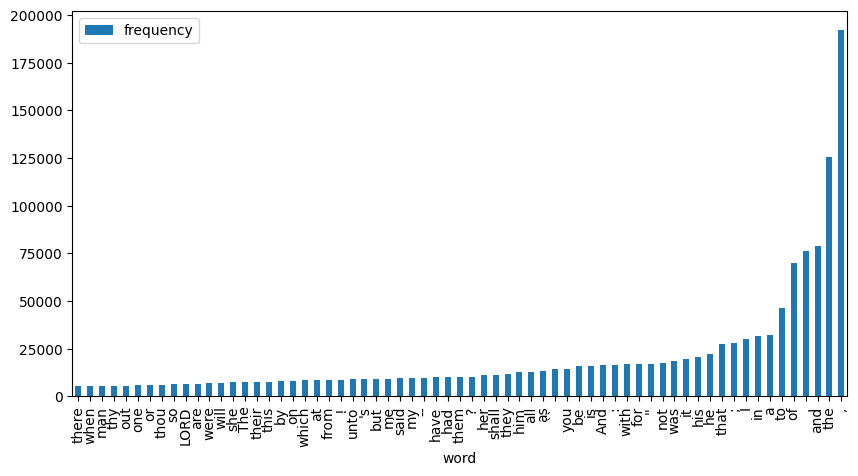

In [15]:
df[df.frequency>5000].sort_values('frequency').plot(x='word', y='frequency', kind='bar', figsize=(10, 5))

## 5. Переписать mapper и reducer из заданий 1-4 для hadooplike_job, проверить что логика их работы не меняется. Меняется ли ответ, если использовать редюсер и в качестве комбайнера тоже?



In [16]:
def count_words_mapper(line: str) -> List[Tuple[str, int]]:
  return [(w, 1) for w in wordpunct_tokenize(line)]

In [17]:
count_words_mapper("Переписать mapper и reducer из заданий 1-4 для hadooplike_job, проверить что логика их работы не меняется. Меняется ли ответ, если использовать редюсер и в качестве комбайнера тоже?")

[('Переписать', 1),
 ('mapper', 1),
 ('и', 1),
 ('reducer', 1),
 ('из', 1),
 ('заданий', 1),
 ('1', 1),
 ('-', 1),
 ('4', 1),
 ('для', 1),
 ('hadooplike_job', 1),
 (',', 1),
 ('проверить', 1),
 ('что', 1),
 ('логика', 1),
 ('их', 1),
 ('работы', 1),
 ('не', 1),
 ('меняется', 1),
 ('.', 1),
 ('Меняется', 1),
 ('ли', 1),
 ('ответ', 1),
 (',', 1),
 ('если', 1),
 ('использовать', 1),
 ('редюсер', 1),
 ('и', 1),
 ('в', 1),
 ('качестве', 1),
 ('комбайнера', 1),
 ('тоже', 1),
 ('?', 1)]

In [19]:
word_counters = map_layer(count_words_mapper)
list(word_counters(carroll_alice))[:10]

[('[', 1),
 ('Alice', 1),
 ("'", 1),
 ('s', 1),
 ('Adventures', 1),
 ('in', 1),
 ('Wonderland', 1),
 ('by', 1),
 ('Lewis', 1),
 ('Carroll', 1)]

In [43]:
counter_adder = reduce_layer(sum)
alice_wordcounts = counter_adder(merge_layer(word_counters(carroll_alice)))

sorted(alice_wordcounts.items(), key=lambda pair: -pair[1])[:20]

[(',', 1993),
 ("'", 1731),
 ('the', 1527),
 ('and', 802),
 ('.', 764),
 ('to', 725),
 ('a', 615),
 ('I', 543),
 ('it', 527),
 ('she', 509),
 ('of', 500),
 ('said', 456),
 (",'", 397),
 ('Alice', 396),
 ('in', 357),
 ('was', 352),
 ('you', 345),
 ("!'", 278),
 ('that', 275),
 ('as', 246)]

In [24]:
df = pd.DataFrame(alice_wordcounts.items(), columns=["word", "frequency"])
df = df.sort_values(by="frequency", ascending=False)
df

,word,frequency
32,",",1993
2,',1731
16,the,1527
33,and,802
14,.,764
...,...,...
1707,content,1
1706,losing,1
1705,contradicted,1
1703,DON,1


<Axes: xlabel='word'>

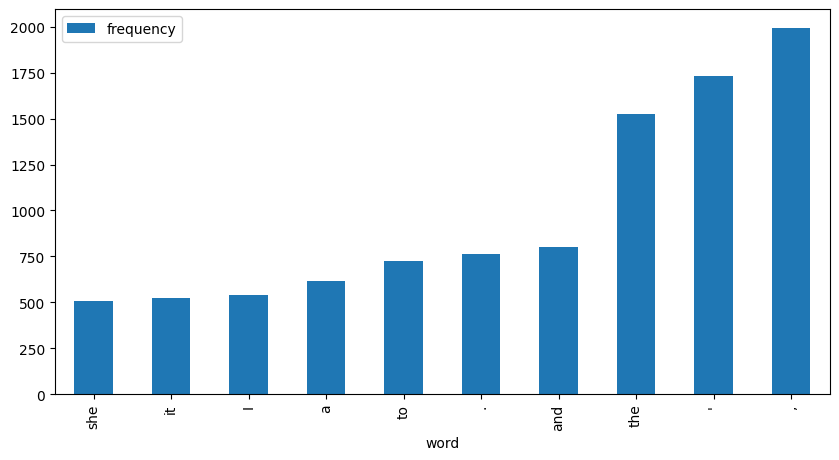

In [44]:
df[df.frequency>500].sort_values('frequency').plot(x='word', y='frequency', kind='bar', figsize=(10, 5))

In [27]:
gutenberg_split = [[(f, gutenberg.raw(f))] for f in gutenberg.fileids()]

[[(k, len(v)) for k,v in node_records] for node_records in gutenberg_split]

[[('austen-emma.txt', 887071)],
 [('austen-persuasion.txt', 466292)],
 [('austen-sense.txt', 673022)],
 [('bible-kjv.txt', 4332554)],
 [('blake-poems.txt', 38153)],
 [('bryant-stories.txt', 249439)],
 [('burgess-busterbrown.txt', 84663)],
 [('carroll-alice.txt', 144395)],
 [('chesterton-ball.txt', 457450)],
 [('chesterton-brown.txt', 406629)],
 [('chesterton-thursday.txt', 320525)],
 [('edgeworth-parents.txt', 935158)],
 [('melville-moby_dick.txt', 1242990)],
 [('milton-paradise.txt', 468220)],
 [('shakespeare-caesar.txt', 112310)],
 [('shakespeare-hamlet.txt', 162881)],
 [('shakespeare-macbeth.txt', 100351)],
 [('whitman-leaves.txt', 711215)]]

In [46]:
gutenberg_lines = [list(enumerate(gutenberg.raw(f).splitlines())) for f in gutenberg.fileids()]

gutenberg_lines[7][:10]

[(0, "[Alice's Adventures in Wonderland by Lewis Carroll 1865]"),
 (1, ''),
 (2, 'CHAPTER I. Down the Rabbit-Hole'),
 (3, ''),
 (4, 'Alice was beginning to get very tired of sitting by her sister on the'),
 (5,
  'bank, and of having nothing to do: once or twice she had peeped into the'),
 (6,
  'book her sister was reading, but it had no pictures or conversations in'),
 (7,
  "it, 'and what is the use of a book,' thought Alice 'without pictures or"),
 (8, "conversation?'"),
 (9, '')]

In [29]:
def word_counts(k:Any, text:str) -> List[Tuple[str, int]]:
  return [(word, 1) for word in word_tokenize(text)]

T = TypeVar('T')

def len_mapper(k: T, text) -> List[Tuple[T, int]]:
  return [(k, len(text))]

[[len_mapper(k, v) for k, v in local_records] for local_records in gutenberg_split]

[[[('austen-emma.txt', 887071)]],
 [[('austen-persuasion.txt', 466292)]],
 [[('austen-sense.txt', 673022)]],
 [[('bible-kjv.txt', 4332554)]],
 [[('blake-poems.txt', 38153)]],
 [[('bryant-stories.txt', 249439)]],
 [[('burgess-busterbrown.txt', 84663)]],
 [[('carroll-alice.txt', 144395)]],
 [[('chesterton-ball.txt', 457450)]],
 [[('chesterton-brown.txt', 406629)]],
 [[('chesterton-thursday.txt', 320525)]],
 [[('edgeworth-parents.txt', 935158)]],
 [[('melville-moby_dick.txt', 1242990)]],
 [[('milton-paradise.txt', 468220)]],
 [[('shakespeare-caesar.txt', 112310)]],
 [[('shakespeare-hamlet.txt', 162881)]],
 [[('shakespeare-macbeth.txt', 100351)]],
 [[('whitman-leaves.txt', 711215)]]]

In [30]:
def alice_texts(nodes:int=4, records:int=4, size:int=3) -> List[List[Tuple[Tuple[int, int], str]]]:
  return [[(i*records+j, gutenberg.raw('carroll-alice.txt')) for j in range(records)] for i in range(nodes)]

alice_texts()

[[(0,
   '[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the ti

In [31]:
records = [('a', 1), ('b', 2), ('c', 3)]
print(list(zip(*records)))

[('a', 'b', 'c'), (1, 2, 3)]


In [32]:
list(map(lambda k, v: (k, v), ('a', 'b', 'c'), (1, 2, 3)))

[('a', 1), ('b', 2), ('c', 3)]

In [33]:
def map_local(mapper: Callable) -> Callable:
  def inner(records: Iterable[Tuple]) -> List:
    return [pair for k, v in records for pair in mapper(k, v)]
  return inner

def double(k, v) -> List[Tuple]:
  return [(k, v)] * 2

print(f"double('a', 1)=", double('a', 1))

print(records, " -> map_local(double) -> ", map_local(double)(records))

double('a', 1)= [('a', 1), ('a', 1)]
[('a', 1), ('b', 2), ('c', 3)]  -> map_local(double) ->  [('a', 1), ('a', 1), ('b', 2), ('b', 2), ('c', 3), ('c', 3)]


In [34]:
K = TypeVar('K')
V = TypeVar('V')

def merge(pairs: Tuple[K, V]) -> List[Tuple[K, List[V]]]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k] = result[k] + [v]
  return list(result.items())

records = [('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)]

print(f'merge({records}) = ', merge(records))

merge([('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)]) =  [('a', [1, 4, 5]), ('b', [2]), ('c', [3]), ('x', [6]), ('y', [7])]


In [35]:
def summer(k: K, values: List[V]) -> List[Tuple[K, Any]]:
  return [(k, sum(values))]

summer('x', range(10))

[('x', 45)]

In [36]:
local_data = [('a', [1, 2, 3]), ('b', [2])]

print(f"summer('a', [1,2,3])=", summer('a', [1,2,3]))

print(local_data, " -> map_local(summer) -> ", map_local(summer)(local_data))

summer('a', [1,2,3])= [('a', 6)]
[('a', [1, 2, 3]), ('b', [2])]  -> map_local(summer) ->  [('a', 6), ('b', 2)]


In [37]:
def hash_partitioner(k:Hashable, v:int, N:int) -> int:
  return hash(k)%N
data = "Hello World!"
list(zip(data, [hash_partitioner(c, 'whatever', 7) for c in data]))

[('H', 6),
 ('e', 2),
 ('l', 5),
 ('l', 5),
 ('o', 0),
 (' ', 3),
 ('W', 4),
 ('o', 0),
 ('r', 4),
 ('l', 5),
 ('d', 2),
 ('!', 3)]

In [38]:
def shuffle(pairs_by_node: List[List[Tuple[K, V]]], Np: int, partitioner:Callable[[K, int, int], int]=hash_partitioner) -> List[List[Tuple[K, List[V]]]]:
  partitions = [defaultdict(list) for _ in range(Np)]
  for pairs in pairs_by_node:
    for k, v in pairs:
      partition = partitions[partitioner(k, v, Np)]
      partition[k].append(v)
  return [[(k, values) for k, values in d.items()] for d in partitions]

shuffle([[('a', 1), ('b', 2), ('c', 3)],
         [('a', 4), ('a', 5)],
         [('x', 6), ('y', 7)]],
        4)

[[('y', [7])], [], [('b', [2]), ('x', [6])], [('a', [1, 4, 5]), ('c', [3])]]

In [39]:
def describe(name: str, value: Any) -> None:
  if hasattr(value, '__len__'):
    print(f'{name} is a {type(value).__name__} of length {len(value)}')
  else:
    print(f'{name} is a {type(value).__name__}')

def debug(name: str, v: List) -> None:
  describe(name, v)
  for i, u in enumerate(v):
    if len(u):
      describe(name + f'[{i}]', u)
      print(f'{name}[{i}][0] = {str(u[0])[:100]}')
      return
  i = 0
  u = v[0]
  describe(name + f'[{i}]', u)
  describe(name + f'[{i}][0]', u[0])
  print(f'{v}[{i}][0] = {str(u[0])[:100]}')

def hadooplike_job(mapper:Callable, reducer:Callable=None, combiner:Callable=None, to_nodes:int=4) -> Callable:
  def inner(input: List[List[Tuple]]) -> List[List[Tuple]]:
    debug('input', input)
    mapped = list(map(map_local(mapper), input))
    debug('mapped', mapped)
    if reducer is None:
      return mapped

    if combiner:
      merged = list(map(merge, mapped))
      debug('merged', merged)
      combined = list(map(map_local(combiner), merged))
      debug('combined', combined)

    else:
      combined = mapped

    shuffled = shuffle(combined, to_nodes)
    debug('shuffled', shuffled)
    reduced = list(map(map_local(reducer), shuffled))
    debug('reduced', reduced)
    return reduced
  return inner

In [40]:
wordcounter = hadooplike_job(word_counts, summer, summer, 4)

result = wordcounter(alice_texts())
pass
pd.DataFrame(chain(*result), columns=["word", "occurences"]).sort_values("occurences").tail(10)

input is a list of length 4
input[0] is a list of length 4
input[0][0] = (0, '[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\


mapped is a list of length 4
mapped[0] is a list of length 133976
mapped[0][0] = ('[', 1)
merged is a list of length 4
merged[0] is a list of length 3184
merged[0][0] = ('[', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
combined is a list of length 4
combined[0] is a list of length 3184
combined[0][0] = ('[', 12)
shuffled is a list of length 4
shuffled[0] is a list of length 795
shuffled[0][0] = ('[', [12, 12, 12, 12])
reduced is a list of length 4
reduced[0] is a list of length 795
reduced[0][0] = ('[', 48)


,word,occurences
1578,she,8096
2384,it,8192
2379,I,8528
2386,a,9824
5,to,11472
802,and,12112
1572,.,15600
2387,',20944
1573,the,24256
2381,",",38688


In [41]:
%time result = wordcounter(gutenberg_split)
pd.DataFrame(chain(*result), columns=["word", "occurences"]).sort_values("occurences").tail(10)

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso


mapped is a list of length 18
mapped[0] is a list of length 191785
mapped[0][0] = ('[', 1)
merged is a list of length 18
merged[0] is a list of length 8406
merged[0][0] = ('[', [1, 1])
combined is a list of length 18
combined[0] is a list of length 8406
combined[0][0] = ('[', 2)
shuffled is a list of length 4
shuffled[0] is a list of length 15384
shuffled[0][0] = ('[', [2, 1, 3, 1, 1, 4, 6, 3, 14, 1, 1, 10, 3, 2, 3, 6, 4, 66])
reduced is a list of length 4
reduced[0] is a list of length 15384
reduced[0][0] = ('[', 131)
CPU times: total: 1min 9s
Wall time: 1min 21s


,word,occurences
15394,;,27942
46406,I,30139
15396,in,31868
46408,a,32390
6,to,46103
7,of,70031
30895,.,76300
15387,and,78726
30887,the,125717
46407,",",192339
